# MODEL 

Cargamos las librerias necesarias

In [61]:
from _utils import *
import pandas as pd

## Cargamos la data

In [62]:
df_1 = pd.read_json("./datasets/1_halving.json")
df_2 = pd.read_json("./datasets/2_halving.json")
df_3 = pd.read_json("./datasets/3_halving.json")
df_4 = pd.read_json("./datasets/4_halving.json")

## Preparamos la data

In [63]:
def get_series_by_coin(coin: str, df: pd.DataFrame):
    new_df = df.where(df["name"] == coin).dropna()
    return new_df

In [64]:
dataset = pd.concat([df_1,df_2,df_3,df_4])

In [65]:
df_bitcoin = get_series_by_coin("Bitcoin",dataset)
df_bitcoin.set_index("datetime", inplace=True)
df_bitcoin = df_bitcoin.sort_index()
df_bitcoin

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2012-12-01 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,12.665000,12.679990,12.261722,12.500020,1.966736e+05
2012-12-02 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,12.490810,12.678990,12.320000,12.678990,3.983061e+05
2012-12-03 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,12.678990,13.499263,12.433030,13.409927,8.839310e+05
2012-12-04 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,13.400557,13.420000,12.700000,13.375447,4.366438e+05
2012-12-05 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,13.300010,13.688800,12.908408,13.232808,6.775296e+05
...,...,...,...,...,...,...,...,...,...,...
2024-06-03 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,68797.103953,71043.410229,68558.999100,70544.378768,1.920820e+10
2024-06-04 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,70546.222290,71740.526715,70391.398455,71106.456344,1.960925e+10
2024-06-05 19:00:00,1e31218a-e44e-4285-820c-8282ee222035,6057.0,BTC,Bitcoin,bitcoin,71097.537698,71608.150190,70183.051691,70772.259202,1.498466e+10


In [66]:
#Variables for training
cols = list(df_bitcoin)[-1:4:-1]
#Date and volume columns are not used in training. 
print(cols) 

['volume', 'close', 'low', 'high', 'open']


In [67]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<Axes: xlabel='datetime'>

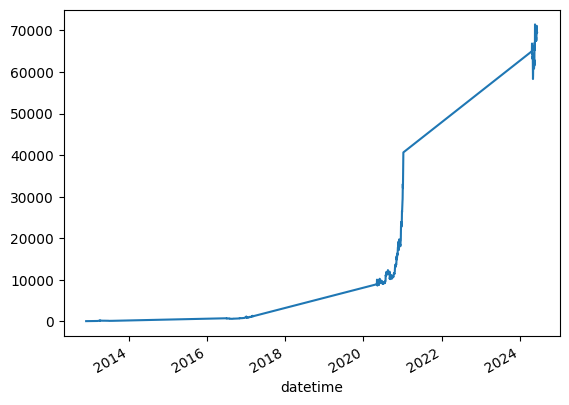

In [68]:
#New dataframe with only training data - 5 columns
df_for_training = df_bitcoin[cols].astype(float)

df_for_plot=df_for_training.tail(5000)
df_for_plot["close"].plot.line()

In [146]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df_for_plot.index.values).to_list()
train_dates[:5]

[Timestamp('2012-12-01 19:00:00'),
 Timestamp('2012-12-02 19:00:00'),
 Timestamp('2012-12-03 19:00:00'),
 Timestamp('2012-12-04 19:00:00'),
 Timestamp('2012-12-05 19:00:00')]

In [108]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_training_scaled

array([[-0.653124  , -0.52504459, -0.52323427, -0.52527078, -0.52421293],
       [-0.65309502, -0.52503357, -0.52323059, -0.52527084, -0.52422371],
       [-0.65302521, -0.52498855, -0.52322347, -0.52522117, -0.52421207],
       ...,
       [ 1.50091304,  3.83289765,  3.89860009,  3.81005917,  3.87107945],
       [ 2.54918274,  3.74438113,  3.79773064,  3.8291598 ,  3.85095304],
       [ 0.31251792,  3.75107862,  3.83755189,  3.68609665,  3.7646224 ]])

In [91]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (789, 14, 5).
trainY shape == (789, 1).


In [92]:
# define the Autoencoder model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

d:\Codes\Crypto\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 14, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1509 - val_loss: 6.0317
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0757 - val_loss: 2.1780
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0736 - val_loss: 2.2490
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0521 - val_loss: 2.2772
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - val_loss: 2.1107


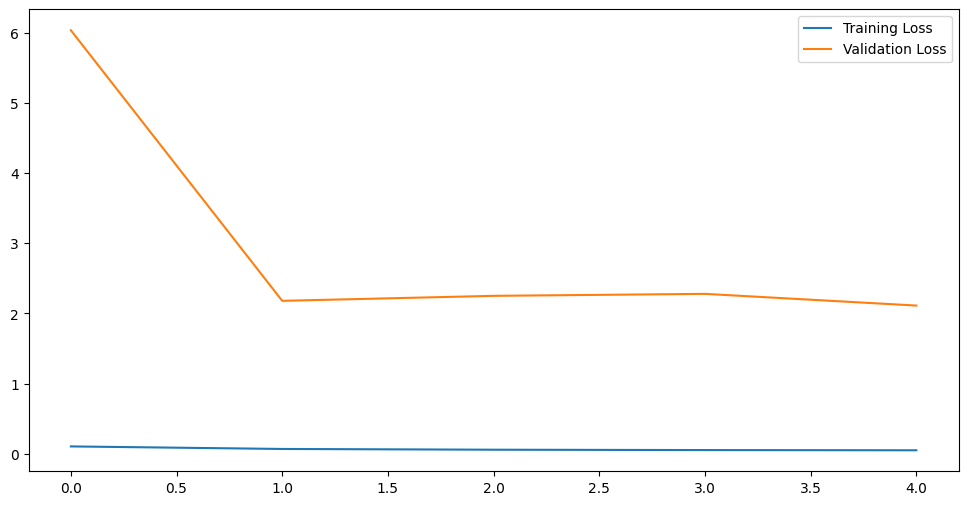

In [139]:
# Visualize train process
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [95]:
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq="1d").tolist()
print(predict_period_dates)

[Timestamp('2024-05-23 19:00:00'), Timestamp('2024-05-24 19:00:00'), Timestamp('2024-05-25 19:00:00'), Timestamp('2024-05-26 19:00:00'), Timestamp('2024-05-27 19:00:00'), Timestamp('2024-05-28 19:00:00'), Timestamp('2024-05-29 19:00:00'), Timestamp('2024-05-30 19:00:00'), Timestamp('2024-05-31 19:00:00'), Timestamp('2024-06-01 19:00:00'), Timestamp('2024-06-02 19:00:00'), Timestamp('2024-06-03 19:00:00'), Timestamp('2024-06-04 19:00:00'), Timestamp('2024-06-05 19:00:00'), Timestamp('2024-06-06 19:00:00')]


In [142]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,4]
print(y_pred_future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[39367.207 37112.492 34925.098 34274.188 34812.934 34915.203 34786.652
 34442.902 32903.46  31792.572 32307.49  33121.2   33872.383 34106.08
 34926.098]


<Axes: xlabel='datetime', ylabel='open'>

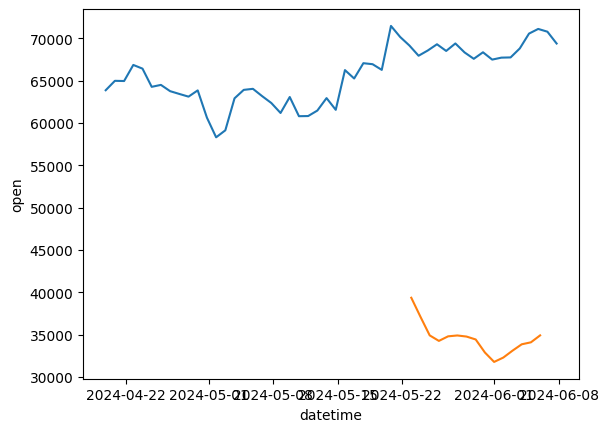

In [143]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'open':y_pred_future})
df_forecast.set_index('date', inplace=True)

original = df_bitcoin[['open']]
original = original.loc[(original.index < '2024-06-08') & (original.index > '2023-05-24')]

sns.lineplot(original['open'])
sns.lineplot( df_forecast['open'])